# inspect single model


In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
from model import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## timestamp and dir for saving
tstamp = time.perf_counter_ns()
import os
os.mkdir('figures/scratch_folders/%i'%tstamp)

In [3]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
humanB_acc,humanI_acc = hdf.loc[:,('blocked mean','interleaved mean')].values.T

In [4]:
## default params
taskargs = {
  'condition':'blocked',
  'n_train':160,
  'n_test':40
}
schargs = {
    'concentration':220,
    'stickiness_wi':300,
    'stickiness_bt':400, # 100
    'sparsity':1.5,
    'pvar': 0,
    'lrate':1,
    'lratep':1,
    'decay_rate':1,
} 
semargs = {
  'beta2':False
}
args = {
    'sem':semargs,
    'sch':schargs,
    'exp':taskargs
}
param_str = "-".join(["%s_%.3f"%(i,j) for i,j in schargs.items()])
param_str += "-"+"-".join(["%s_%.3f"%(i,j) for i,j in semargs.items()])
param_str

'concentration_220.000-stickiness_wi_300.000-stickiness_bt_400.000-sparsity_1.500-pvar_0.000-lrate_1.000-lratep_1.000-decay_rate_1.000-beta2_0.000'

### main

In [5]:
ns = 100
L = []
condL = ['blocked','interleaved',
         'early','middle','late'
        ]
exp_batch_data = run_batch_exp_curr(ns,args,condL) # [curr,seeds,{data}]


In [6]:
## accuracy
# bads = get_bad_seed(exp_batch_data,max_splits=50)
# goods = np.setdiff1d(np.arange(ns),bads)
batch_acc = unpack_acc(exp_batch_data) # curr,seeds,trials
mean_acc = batch_acc.mean(1)
test_acc = mean_acc[:,-40:].mean(1) # curr  
test_acc

array([1.        , 0.50838601, 1.        , 0.78976924, 0.61460616])

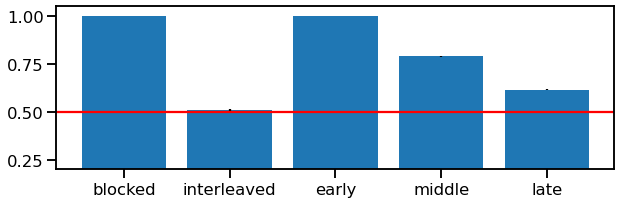

In [7]:
plt.figure(figsize=(10,3))
M = mean_acc[:,-40:].mean(1)
S = mean_acc[:,-40:].std(1)/np.sqrt(ns)
plt.bar(condL,test_acc,yerr=S)
plt.ylim(0.2,1.05)
plt.axhline(0.5,c='r')
plt.savefig('figures/single_model_nb/testacc%s.png'%param_str)

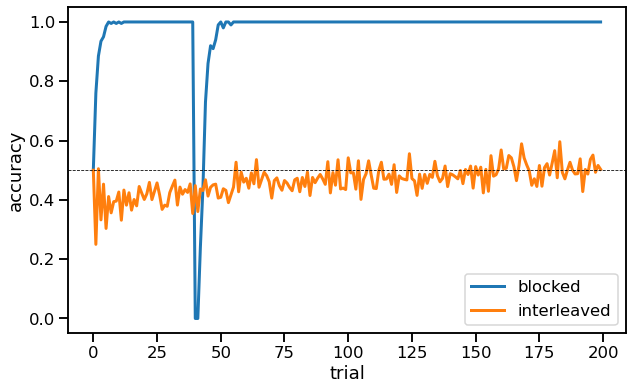

In [8]:
f,ax = plt.subplots(1,1,figsize=(10,6))
for idx in range(len(condL[:2])):
  ax.plot(mean_acc[idx],label=condL[idx],lw=3)
ax.axhline(0.5,c='k',ls='--',lw=0.8)
ax.set_xlabel('trial')
ax.set_ylabel('accuracy')
# ax.set_
plt.legend()
plt.savefig('figures/coglunch21/acc-by-time-%s.png'%param_str)


# analysis of model state

[3.   6.74]


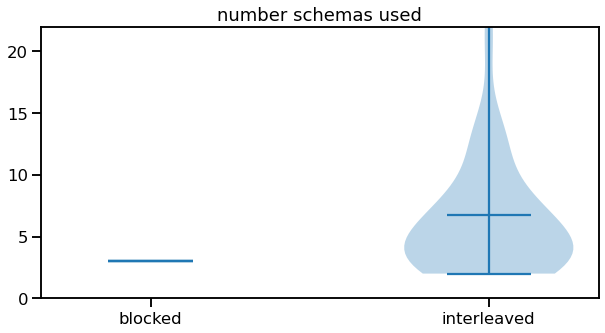

In [16]:
## count number of schemas used
def count_num_schemas(exp_data):
  """ 
  """
  L = []
  for curr_idx in range(5):
    num_schemas_used = [
      len(np.unique(exp_data[curr_idx][i]['zt'][:,:-1].flatten())
         ) for i in range(ns)
    ]
    L.append(num_schemas_used)
  nschemas = np.array(L)
  return nschemas


nschemas = count_num_schemas(exp_batch_data)
nschemas = nschemas[:2,:]

M = nschemas.mean(1)
print(M)
S = nschemas.std(1)
plt.figure(figsize=(10,5))
plt.title('number schemas used')
plt.violinplot(nschemas.T,np.arange(2),showmeans=True)
# plt.bar(condL,M,zorder=-100,alpha=0.1)
ax = plt.gca()
ax.set_xticks([0,1])
ax.set_xticklabels(condL[:2])
ax.set_ylim(0,22)
plt.savefig('figures/coglunch21/violin-numsch')

In [10]:
curr_idx = 0
seed_idx = 1
## 
prior = unpack_data(exp_batch_data,
        dtype='prior')[curr_idx][seed_idx]
like = unpack_data(exp_batch_data,
        dtype='like')[curr_idx][seed_idx]
post = unpack_data(exp_batch_data,
        dtype='post')[curr_idx][seed_idx]
post.shape

(200, 5, 3)

In [11]:
curr = 0
seed = 4
zt = exp_batch_data[curr][seed]['zt']
st = exp_batch_data[curr][seed]['exp']

prior = unpack_data(exp_batch_data,
        dtype='prior')[curr][seed] # trial,tstep,sch
like = unpack_data(exp_batch_data,
        dtype='like')[curr][seed]
post = unpack_data(exp_batch_data,
        dtype='post')[curr][seed]


for i in range(200):
  print(i,zt[i],st[i],
#        post[i,:,1],
#        post[i,:,2]
       )

0 [ 0. -1.  0.  0. -1.] [0 1 3 5 7]
1 [ 0. -1.  0.  0. -1.] [0 1 3 5 7]
2 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
3 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
4 [ 0. -1.  0.  0. -1.] [0 1 3 5 7]
5 [ 0. -1.  0.  0. -1.] [0 1 3 5 7]
6 [ 0. -1.  0.  0. -1.] [0 1 3 5 7]
7 [ 0. -1.  0.  0. -1.] [0 1 3 5 7]
8 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
9 [ 0. -1.  0.  0. -1.] [0 1 3 5 7]
10 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
11 [ 0. -1.  0.  0. -1.] [0 1 3 5 7]
12 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
13 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
14 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
15 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
16 [ 0. -1.  0.  0. -1.] [0 1 3 5 7]
17 [ 0. -1.  0.  0. -1.] [0 1 3 5 7]
18 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
19 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
20 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
21 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
22 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
23 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
24 [ 0. -1.  0.  0. -1.] [0 1 3 5 7]
25 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
26 [ 0. -1.  0.  0. -1.] [0 1 4 6 8]
27 [ 0. -1.

In [12]:
tstep = 0
sch = 1
post = unpack_data(exp_batch_data,
        dtype='post')[curr_idx][sch]
post[:,tstep,sch]


array([110.        , 110.        , 110.        , 110.        ,
       110.        , 110.        , 110.        , 110.        ,
       110.        , 110.        , 110.        , 110.        ,
       110.        , 110.        , 110.        , 110.        ,
       110.        , 110.        , 110.        , 110.        ,
       110.        , 110.        , 110.        , 110.        ,
       110.        , 110.        , 110.        , 110.        ,
       110.        , 110.        , 110.        , 110.        ,
       110.        , 110.        , 110.        , 110.        ,
       110.        , 110.        , 110.        , 110.        ,
       110.        , 251.875     , 284.2       , 306.75      ,
       323.71428571, 337.1875    , 348.33333333, 357.85      ,
       366.18181818, 373.625     , 380.38461538, 386.60714286,
       392.4       , 397.84375   , 403.        , 407.91666667,
       412.63157895, 417.175     , 421.57142857, 425.84090909,
       430.        , 434.0625    , 438.04      , 441.94

In [13]:
def get_bad_seed(exp_batch_data,max_splits=10):
  bad_seed_L = []
  for curr_idx in range(5):
    for seed_idx in range(ns):
      max_sch = np.max(exp_batch_data[curr_idx][seed_idx]['zt'])
      if max_sch>max_splits:
        bad_seed_L.append(seed_idx)
  return list(set(bad_seed_L))
get_bad_seed(exp_batch_data,max_splits=10)

[1,
 2,
 4,
 6,
 8,
 10,
 12,
 13,
 14,
 25,
 28,
 29,
 31,
 34,
 35,
 37,
 38,
 39,
 44,
 47,
 48,
 50,
 51,
 54,
 57,
 58,
 59,
 60,
 62,
 66,
 71,
 73,
 82,
 83,
 85,
 86,
 87,
 90,
 91,
 93,
 94,
 95]